# 06 Deep Q agent with bad hyper-parameters

#### 👉 Let's use a neural network model to approximate the Q function.

#### 👉Neural networks are usually highly-parametric models that are able to fit complex patterns between the input features and the target.

#### 👉 The type of neural network we will use is a Multi Layer Perceptron (MLP).

#### 👉MLPs are stacks of linear models, interleaved with so called activation functions.

![nn](https://github.com/Paulescu/hands-on-rl/blob/main/03_cart_pole/images/neural_net.jpg?raw=true)

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


## Environment 🌎

In [7]:
import gym
env = gym.make('CartPole-v1')


## Hyperparameters

In [8]:
# Bad hyper-parameters
hparams = {
    'learning_rate': 0.000171782176772688,
    'discount_factor': 0.95,
    'batch_size': 32,
    'memory_size': 10000,
    'freq_steps_train': 8,
    'freq_steps_update_target': 10,
    'n_steps_warm_up_memory': 1000,
    'n_gradient_steps': 4,
    'nn_hidden_layers': [256, 256],
    'max_grad_norm': 10,
    'normalize_state': False,
    'epsilon_start': 0.9,
    'epsilon_end': 0.19818684841911674,
    'steps_epsilon_decay': 1000,
}

SEED = 0

## ⚠️ Fix random seeds

In [9]:
from src.utils import set_seed
set_seed(env, SEED)

## Deep Q-Agent

In [10]:
from src.q_agent import QAgent
agent = QAgent(env, **hparams)

67,586 parameters


## Train the agent 🏋️

In [11]:
from src.loops import train
train(agent, env, n_episodes=200)

100%|██████████████████████████████████████████████████████████████████████████| 200/200 [00:11<00:00, 16.82it/s]

Reward mean: 176.07, std: 22.44
Num steps mean: 176.07, std: 22.44


## Evaluate the agent ⏱️

In [12]:
from src.loops import evaluate
rewards, steps = evaluate(
    agent, env,
    n_episodes=1000,
    epsilon=0.00
)

100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:32<00:00, 30.94it/s]


In [13]:
import numpy as np
reward_avg = np.array(rewards).mean()
reward_std = np.array(rewards).std()
print(f'Reward average {reward_avg:.2f}, std {reward_std:.2f}')

Reward average 177.89, std 21.50


## Let's see how far we got in each attempt

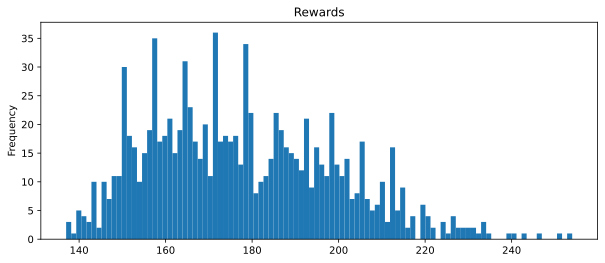

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize = (10, 4))
ax.set_title("Rewards")    
pd.Series(rewards).plot(kind='hist', bins=100)

plt.show()

## Let's see our agent in action 🎬

In [49]:
# Workaround for pygame error: "error: No available video device"
# See https://stackoverflow.com/questions/15933493/pygame-error-no-available-video-device?rq=1
# This is probably needed only for Linux
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"
from src.viz import show_video

show_video(agent, env, sleep_sec=0.01, seed=123)